<a href="https://colab.research.google.com/github/nekesuresh/K-Means-Clustering-with-DTW-Metric/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dtaidistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


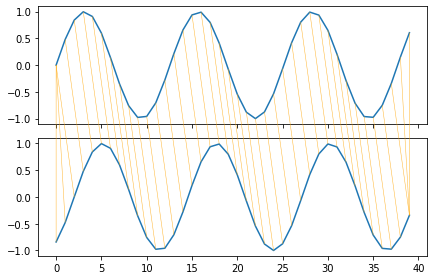

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
distance = dtw.distance(s1, s2)

In [ ]:
#signal1 is from true positive
import json
import ipywidgets as widgets
f = open('/content/signal (4).json')
data = json.load(f)

In [ ]:
keys=[]
for i in list(data.keys()):
  if i[0]=='0':
    keys.append(i)  
selector=widgets.Dropdown(
    options=keys,
    description='select option',
    disabled=False
)
display(selector)

Dropdown(description='select option', options=('0009_DirectCurrentConjugation_V1p0', '0010_DirectCurrentConjug…

In [ ]:


true_positive=data[selector.value]['signal']

In [ ]:
#signal(2) is from false positive

In [ ]:

f = open('/content/signal (3).json')
data = json.load(f)

In [ ]:
keys=[]
for i in list(data.keys()):
  if i[0]=='0':
    keys.append(i)  
selector=widgets.Dropdown(
    options=keys,
    description='select option',
    disabled=False
)
display(selector)

Dropdown(description='select option', options=('0009_DirectCurrentConjugation_V1p0', '0010_DirectCurrentConjug…

In [ ]:
selector.value

'0010_DirectCurrentConjugation_V1p0'

In [ ]:


false_positive=data[selector.value]['signal']

In [ ]:
len(true_positive)

304000

In [ ]:

f = open('/content/signal (1).json')
data = json.load(f)

In [ ]:
keys=[]
for i in list(data.keys()):
  if i[0]=='0':
    keys.append(i)  
selector=widgets.Dropdown(
    options=keys,
    description='select option',
    disabled=False
)
display(selector)

Dropdown(description='select option', options=('0009_DirectCurrentConjugation_V1p0', '0010_DirectCurrentConjug…

In [ ]:

true_positive1=data[selector.value]['signal']

In [ ]:
f = open('/content/signal (2).json')
data = json.load(f)

In [ ]:
keys=[]
for i in list(data.keys()):
  if i[0]=='0':
    keys.append(i)  
selector=widgets.Dropdown(
    options=keys,
    description='select option',
    disabled=False
)
display(selector)

Dropdown(description='select option', options=('0009_DirectCurrentConjugation_V1p0', '0010_DirectCurrentConjug…

In [ ]:
false_positive1=data[selector.value]['signal']

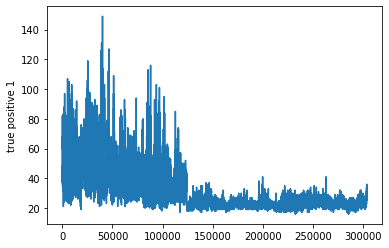

In [ ]:
import matplotlib.pyplot as plt
plt.plot(true_positive1)
plt.ylabel('true positive 1')
plt.show()

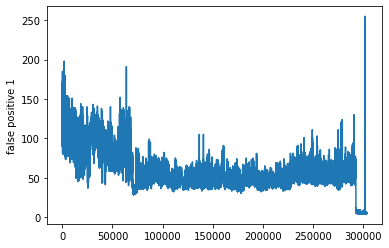

In [ ]:
import matplotlib.pyplot as plt
plt.plot(false_positive1)
plt.ylabel('false positive 1')
plt.show()

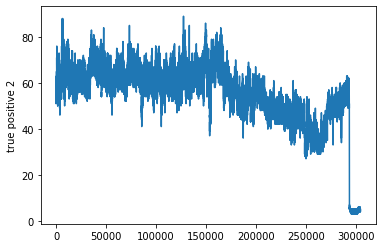

In [ ]:
import matplotlib.pyplot as plt
plt.plot(true_positive)
plt.ylabel('true positive 2')
plt.show()

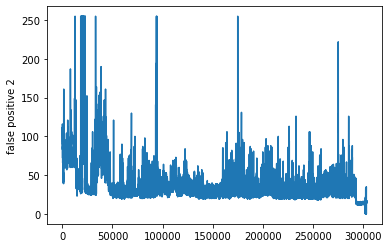

In [ ]:
import matplotlib.pyplot as plt
plt.plot(false_positive)
plt.ylabel('false positive 2')
plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw



In [ ]:
def split_data(data, data_labels, n, classes):
    n_classes = len(np.unique(data_labels))
    #classes = np.unique(data_labels)
    n_train = n*n_classes
    n_test = len(data)-n_train
    test_index = data.index
    
    i= 0
    for x_class in classes:
        index = data_labels.loc[data_labels == classes[i]].index
        nclass = len(index)
        nclass = np.min([n,nclass])
        train_choices = np.random.choice(index, nclass, replace = False)
        test_index = test_index.drop(train_choices)
        if'train_index' not in locals():
            train_index = train_choices
        else:
            train_index = np.concatenate([train_index, train_choices])
            
        i = i+1
    
    return train_index, test_index

def scale_data(data, new_length):
    nsignals = len(data)
    scaled_data = np.zeros([nsignals,new_length])
    for i in range(nsignals):
        scaled_data[i] = adaptive_scaling(data[i], new_length)
    return scaled_data


def adaptive_scaling(signal1, new_length):
    differences = np.diff(signal1)
    absolute_diffs = np.array([abs(d) for d in differences])

    while len(signal1)> new_length:
        
        index = np.argmin(absolute_diffs)
        new_val = np.mean([signal1[index],signal1[index+1]])
        signal1[index] = new_val
        signal1 = np.delete(signal1, index+1)
        differences = np.delete(differences, index)
        absolute_diffs = np.delete(absolute_diffs, index)
        last_index = len(signal1)-1
        
        if index != last_index:
            diff = signal1[index+1]-signal1[index]
            differences[index] = diff
            absolute_diffs[index] = abs(diff)
            
        if index != 0:
            diff = signal1[index]-signal1[index-1]
            differences[index-1] = diff
            absolute_diffs[index-1] = abs(diff)
    
    return signal1


def dtw_average(signals, average_signal, iterations, radius):
    nsignals = len(signals)
    paths = []
    match_indices = []
    signal_indices =[]
    
    for j in range(iterations):
        
        for n in range(nsignals):
            #perform dtw between signals and average 
            paths.append(fastdtw(average_signal, signals[n], radius)[1])
            # breakpoint()
            #extract paired template indexes
            match_indices.append(np.array(paths[n])[:,0])
        
            #extract the paired signal indexes
            signal_indices.append(np.array(paths[n])[:,1]) 
            
        #length of template
        n_average = len(average_signal)

        #initialize array to store the new average signal
        average_signal = []
        #time_index = []
        
        #iterate through indices of the template signal
        for i in range(n_average):
            
            for n in range(nsignals):
               
                #check to see if the template index i was paired with indexes of signaln
                if i in match_indices[n]:
                    
    
                    #if so find indexes of pairs which contain the template index
                    indices = np.where(match_indices[n] == i)[0]

                
                    #check to see if signal_values exists
                    if 'signal_values' in locals():

                        #if so find the paired signal2 indices, extract signal values and concat to signal_values
            #
                        signal_values = np.concatenate((signal_values,signals[n][signal_indices[n][indices]]))

                    else:
                        #if not find the paired signal2 indices, extract signal values 
            #
                        signal_values = signals[n][signal_indices[n][indices]]
            
            #if signal_values exists take the mean and update average_signal[i]
            if 'signal_values' in locals():
                average_signal.append(np.mean(signal_values))
                del signal_values
                #save index value for time vector
                #time_index.append(i)
        #convert lists to numpy arrays
        average_signal = np.array(average_signal)
        #time_index = np.array(time_index)
        
    return average_signal

def purity_score(data_labels, clusters):
    in_cluster_count= {}
    correspondence = {}
    cluster_labels = np.unique(clusters)
    N = len(data_labels)
    for k in range(len(cluster_labels)):
        cluster_label = cluster_labels[k]
        cluster = np.where(clusters ==cluster_label)
        if np.any(cluster):
            data_labels = np.array(data_labels, dtype='int')
            
            in_cluster_count[cluster_label] = np.bincount(data_labels[cluster]).max()
            correspondence[cluster_label] = np.bincount(data_labels[cluster]).argmax()
    purity = 0
    for val in in_cluster_count.values():
        purity = purity + val/N
        
    return correspondence, purity    

def get_best_cluster_index(purities, ncluster_list, threshold = .005):
    best_index = 0
    best_number = ncluster_list[best_index]
    best_so_far = purities[best_index]
    max_score = np.max(purities)
    max_score_index = np.argmax(purities)
    
    for i in range(1,len(purities)):

        increase_from_best_so_far = (purities[i]-best_so_far)/(ncluster_list[i]-best_number)

        if increase_from_best_so_far> threshold:

            best_index = i
            best_number = ns[best_index]
            best_so_far = purities[i]

    return best_index

def windowed_dtw(matched, warped, window = None):
    
    #create distance matrix
    N = len(matched)
    M = len(warped)
    
    #create cost matrix
    cost_matrix = np.ndarray((N+1, M+1))
    
    #initialize to infinity
    cost_matrix[:] = np.inf
    
    cost_matrix[0,0] = 0
    
    if window == None:
        window = [(i, j) for i in range(N) for j in range(M)]
    
    #create traceback matrix
    traceback_matrix = np.ones((N,M))*np.inf
    
    #calculate costs and keep track of trace
    for (i,j) in window:
        cost = np.abs(matched[i]-warped[j])
        penalty = [cost_matrix[i,j],  #match 0
                   cost_matrix[i,j+1], # insertion 1
                   cost_matrix[i+1, j]] # deletion 2
        penalty_index = np.argmin(penalty)

        cost_matrix[i+1, j+1] = cost + penalty[penalty_index]
        traceback_matrix[i,j] = penalty_index
            
    #traceback from bottom right corner
    
    i = N-1
    j = M-1
    
    path = [(i, j)]
    
    while (i>0 or j>0):
       
        tb_type = traceback_matrix[i,j]
        
        if tb_type == 0: 
            #match
            i = i-1
            j= j-1
        
        elif tb_type == 1:
            #insertion
            i = i-1
        else:
            #deletion
            j = j-1
        
        path.append((i,j))
    
    #strip infinite row and column from cost matrix
    cost_matrix = cost_matrix[1:, 1:]
    
    distance = cost_matrix[-1,-1]
    #invert path
    path= path[::-1]
    
    return cost_matrix, path, distance

def get_path_window(path, len_m, len_w, radius):
    
    window = set(path)
    increments = list(range(-radius, radius+1))

    for (i,j) in path:

        for inc in increments:

            if (((i+inc) >=0 )& ((i+inc) < (len_m))):
                new_coord = (i+inc, j)
                window.add((new_coord))
            if (((j+inc)>=0) & ((j+inc) < (len_w))):
                new_coord = (i, j+inc)
                window.add((new_coord))
    return window

def reduced_ts(ts):
    len_ts = len(ts)
    red_ts = [(ts[i]+ts[i+1])/2 for i in range(0,len_ts-(len_ts%2), 2)]
    return red_ts


def expand_res_window(path, matched, warped, radius):
    len_m = len(matched)
    len_w = len(warped)

    path_list = [(2*i, 2*j) for (i,j) in path]

    path_set = set(path_list) 

    for i in range(1,len(path_list)):
        new_x = np.mean([path_list[i-1][0], path_list[i][0]])
        new_y = np.mean([path_list[i-1][1], path_list[i][1]])
        new_coord = (int(new_x), int(new_y))
        path_set.add(new_coord)
    path_list = list(path_set)

    for (i,j) in path_list:
        
        if i+1< len_m:
            path_set.add((i+1, j))
        if j+1< len_w:
            path_set.add((i,j+1))
        if ((i+1<len_m) and (j+1<len_w)):
            path_set.add((i+1,j+1))
        
    path_list = list(path_set)

    window = get_path_window(path_list, len_m, len_w, radius)
    window = list(window)
    window = sorted(window, key=lambda item: (item[0], item[1]))

    return window

def fast_dtw(matched, warped, radius = 2):
    min_ts_size = radius + 2
    
    len_m = len(matched)
    len_w = len(warped)
    
    if ((len_m < min_ts_size) or (len_w < min_ts_size)):
        return windowed_dtw(matched, warped, window = None)
    
    else:
        
        shrunk_m = reduced_ts(matched)
        shrunk_w = reduced_ts(warped)
        
        low_res_path, _ = fastdtw(shrunk_m, shrunk_w, radius)
        
        window = expand_res_window(low_res_path, matched, warped, radius)
        
        return windowed_dtw(matched, warped, window)

def kmeans_dtw(data, n_clusters, km_iterations, av_iterations , radius, data_labels):
    n = len(data)

    l_signal = len(data[0])

    #randomly assign samples to clusters
    clusters = np.random.choice(a= np.array(range(n_clusters)),size = n)

    #instantiate centroid array
    centroids = np.zeros((n_clusters, data.shape[1]))

    #instantiate distance array
    distances = np.zeros((n))
    
    purities = []
    
    best_purity = 0
    
    #number of rounds of optimization
    for i in range(km_iterations):

        for k in range(n_clusters):
              
            indices = np.where(clusters == k)[0]

            if np.any(indices):
                if i ==0:
                    centroids[k] = data[np.random.choice(a= indices,size = 1)]
                else:
                    cluster_dists = distances[indices]

                    length_c = len(cluster_dists)

                    #index =  length_c//2 -math.floor((length_c/4)*(purity**2))
                    #index =  length_c//2 -math.floor((length_c/4)*(purity))
                    #centroid_index = indices[np.argsort(cluster_dists)[index]]

                    centroid_index = indices[np.argsort(cluster_dists)[length_c//2]]

                    centroids[k] = data[centroid_index]

                centroids[k] = dtw_average(data[indices], centroids[k], av_iterations, radius)

        for j in range(n):
            best_so_far = np.inf
            best_cluster_index = int
            signal1 = data[j]
            for k in range(n_clusters):
                centroid = centroids[k]
                
####
                path, distance = fastdtw(centroid, signal1, radius)

                if distance < best_so_far:
                    best_so_far = distance
                    best_cluster_index = k   
####

            clusters[j] = best_cluster_index
            distances[j] = best_so_far
        correspondence, purity = purity_score(data_labels, clusters)
        if purity > best_purity:
            best_purity = purity
            best_clusters = deepcopy(clusters)
            best_centroids = deepcopy(centroids)
            best_correspondence = deepcopy(correspondence)
        
        purities.append(purity)
        
        if purity == 1:
            break
            
    return best_clusters, best_centroids, purities, best_correspondence, best_purity

def predict_test_data(test_data, average_signal_list, radius, correspondence):    
    nsignals = len(test_data)
    nclasses = len(average_signal_list)

    predicted_labels = np.zeros([nsignals])
    for i in range(nsignals):
        pred_list = []
        
        signal1 = test_data[i]
        for j in range(nclasses):
            signal2 = average_signal_list[j]
            path, distance = fastdtw(signal1, signal2, radius)
            
            pred_list.append(distance)
          
        #map to original data_labels
        predicted_label = correspondence[np.argmin(pred_list)]
        predicted_labels[i] = predicted_label
    return predicted_labels

In [ ]:
distance, path = fastdtw(true_positive, false_positive, dist=euclidean)
print(distance)

3280594.0


In [ ]:
distance, path = fastdtw(true_positive1, false_positive1, dist=euclidean)
print(distance)

6312644.0


In [ ]:
distance, path = fastdtw(true_positive1, true_positive, dist=euclidean)
print(distance)

3716738.0


In [ ]:
distance, path = fastdtw(false_positive1, false_positive, dist=euclidean)
print(distance)

5664948.0


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7effde96d4d0>,
       dtype=object))

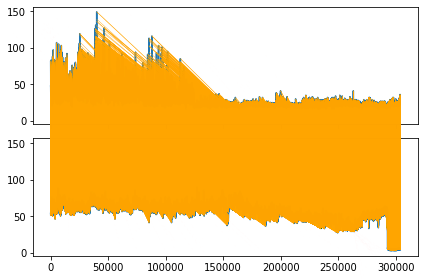

In [ ]:
from dtaidistance import dtw_visualisation as dtwvis
dtwvis.plot_warping(true_positive1, true_positive, path)